<a href="https://colab.research.google.com/github/tahahamdii/SonoGenetics-Project/blob/Segmentation/QC_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.3 MB/s eta 0:00:00


In [2]:
!pip install qiskit_ibm_runtime

In [3]:
!pip install matplotlib

In [4]:
# import the packages installed to your environment
from qiskit import QuantumCircuit
import numpy as np

In [5]:
qc = QuantumCircuit(1)
qc.h(0)
print(qc)

   ┌───┐
q: ┤ H ├
   └───┘


In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [7]:
service = QiskitRuntimeService(channel="ibm_quantum", token="4c0e41d3b37513dbc79ed1bd30616f3e61d861073c4adb3c5933192a11fb7913a5e2acfc582eb8afea678af46742764c5a9f25466992da12c95075e4094e88f4")

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()


{'0': 509, '1': 515}


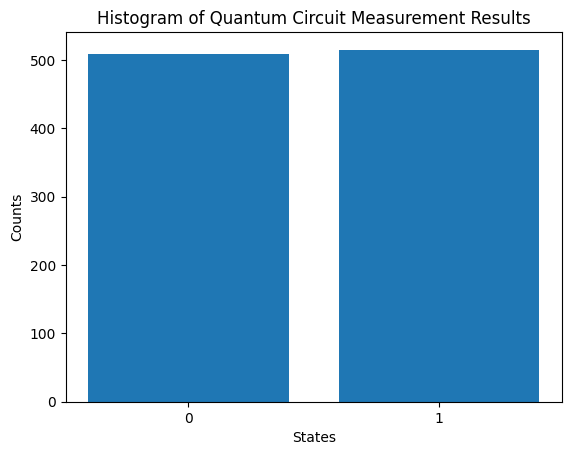

The result of the coin flip is: 1


In [9]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
import matplotlib.pyplot as plt

# Initialize the backend
backend = BasicSimulator()

# Writing a function to call flip coin
def flip_coin(track=False, plot=False):
    # Initialize a quantum register with a single bit
    q = QuantumRegister(1, "q")

    # Initialize a classical register with a single bit
    c = ClassicalRegister(1, "c")

    # Initialize a circuit acting on the single quantum bit
    circuit = QuantumCircuit(q, c, name="flip_coin")

    # Randomize the bit using a Hadamard gate
    circuit.h(q[0])

    # Measure the bit
    circuit.measure(q[0], c[0])

    # Transpile the circuit for optimization
    transpiled_circuit = transpile(circuit, backend=backend)

    # Submit job to qasm simulator
    job = backend.run(transpiled_circuit, shots=1024)

    # Determine output
    result = job.result()
    counts = result.get_counts(circuit)

    if track:
        print(counts)

    if plot:
        # Plot the histogram using Matplotlib
        plt.bar(counts.keys(), counts.values())
        plt.xlabel('States')
        plt.ylabel('Counts')
        plt.title('Histogram of Quantum Circuit Measurement Results')
        plt.show()

    out = 1 if '1' in counts else 0

    return out

# Example usage
result = flip_coin(track=True, plot=True)
print(f"The result of the coin flip is: {result}")


In [12]:
def quantum_random_number_generator(shots=1024):
  # Initialize quantum and classical registers
  q = QuantumRegister(4, 'q')
  c = ClassicalRegister(4, 'c')
  # Create the quantum circuit
  circuit = QuantumCircuit(q, c)
  # Apply Hadamard gates to all qubits
  circuit.h(q)
  # Measure the qubits
  circuit.measure(q, c)
  # Transpile the circuit
  transpiled_circuit = transpile(circuit, backend=backend)
  # Execute the circuit on the simulator
  job = backend.run(transpiled_circuit, shots=1024)
  result = job.result()
  # Get the measurement counts
  counts = result.get_counts(circuit)
  # Plot the results
  plt.bar(counts.keys(), counts.values())
  plt.xlabel('Bit Value')
  plt.ylabel('Counts')
  plt.title('Histogram of Quantum Random Number Generation')
  plt.show()
  # Find the outcome with the maximum occurrences
  max_outcome = max(counts, key=counts.get)
  max_count = counts[max_outcome]
  print(f"Outcome with the highest occurrences: {max_outcome}")
  print(f"Number of occurrences: {max_count}")
  return max_outcome, max_count
  max_outcome, max_count = quantum_random_number_generator(shots=1024)